In [9]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(
    "motorbike_ambulance_calls.csv", 
    encoding="utf-8", 
    sep=",", 
    index_col="index"
)

In [30]:
df["date"] = pd.to_datetime(
    df["date"],
    format="%m/%d/%y"
)

df["season"] = df["date"].apply(
    lambda d: d.month % 12 // 3 + 1
)

In [31]:
df.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


<Axes: xlabel='index', ylabel='cnt'>

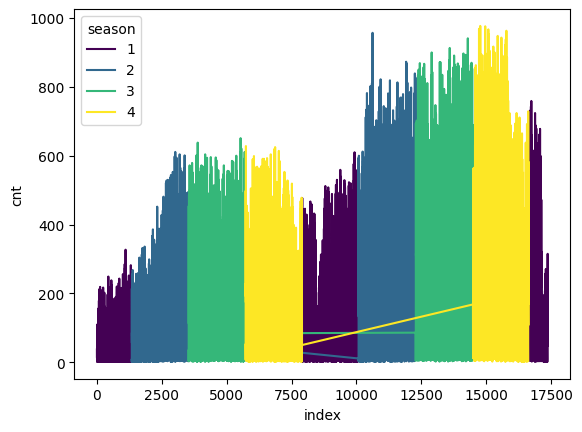

In [32]:
sns.lineplot(
    data=df, 
    x=df.index, 
    y="cnt", 
    hue="season", 
    palette="viridis"
)

З цього графіку можна побачити що кількість викликів у 2012 році значно зросла відносно 2011 року також можна помітити що на початку весни був якийсь дивний скачок викликів що є індикатором аномалій та означає що відбулась якась подія яка не могла статись у звичайних умовах.

In [33]:
features_columns = ["temp", "hum", "windspeed", "cnt"]

In [44]:
scaler = StandardScaler()

scaled_df = pd.DataFrame(
    scaler.fit_transform(
        df[features_columns]
    ), 
    columns=features_columns
)

<Axes: title={'center': 'Feature distribution after scaling'}>

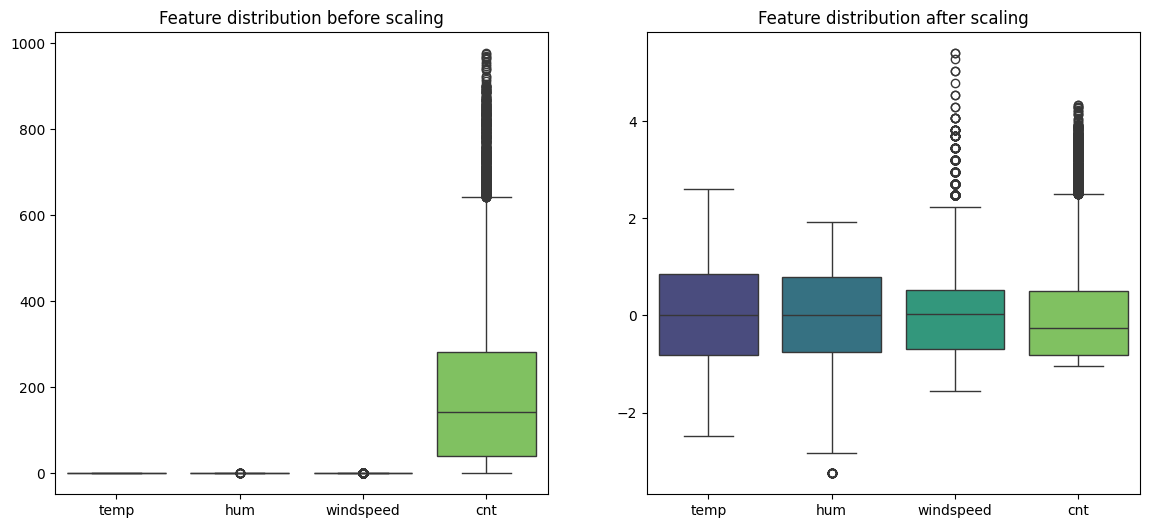

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].set_title("Feature distribution before scaling")
sns.boxplot(
    df[features_columns], 
    ax=ax[0],
    palette="viridis",
)

ax[1].set_title("Feature distribution after scaling")
sns.boxplot(
    scaled_df, 
    ax=ax[1],
    palette="viridis",
)

Після застосування скейлінгу з графіків можна побачити що всі ознаки були нормалізовані та ознака `cnt` більше не є викривленою

In [74]:
forest = IsolationForest(
    n_estimators=100, 
    contamination=0.06, 
    random_state=42
)

df["anomaly"] = forest.fit_predict(scaled_df)

anomalies = df[df["anomaly"] == -1]
normal = df[df["anomaly"] == 1]

In [75]:
anomalies.to_csv("anomalies.csv", index=False)

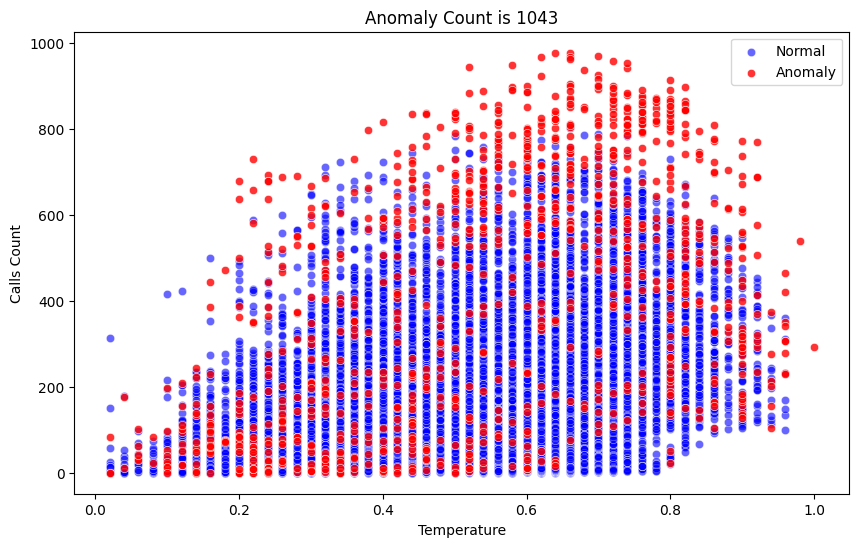

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    normal, 
    x="temp", y="cnt", 
    label="Normal", color="blue", alpha=0.6
)
sns.scatterplot(
    anomalies, 
    x="temp", y="cnt",
    label="Anomaly", color="red", alpha=0.8
)

plt.title(f"Anomaly Count is {len(anomalies)}")
plt.xlabel("Temperature")
plt.ylabel("Calls Count")
plt.legend()

plt.show()

In [78]:
anomalies.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1043,2012-02-14 21:40:33.365292288,2011-01-07 00:00:00,2011-07-30 12:00:00,2012-04-08 00:00:00,2012-08-15 00:00:00,2012-12-30 00:00:00,NaN
season,1043.0,2.501438,1.0,2.0,3.0,3.0,4.0,1.071686
yr,1043.0,0.658677,0.0,0.0,1.0,1.0,1.0,0.474381
mnth,1043.0,6.112176,1.0,3.0,6.0,9.0,12.0,3.248486
hr,1043.0,13.698945,0.0,9.0,15.0,17.0,23.0,5.055875
holiday,1043.0,0.013423,0.0,0.0,0.0,0.0,1.0,0.115132
weekday,1043.0,3.198466,0.0,2.0,3.0,5.0,6.0,1.894511
workingday,1043.0,0.744008,0.0,0.0,1.0,1.0,1.0,0.436627
weathersit,1043.0,1.393097,1.0,1.0,1.0,2.0,3.0,0.666465
temp,1043.0,0.549933,0.02,0.36,0.56,0.74,1.0,0.232399


Для виявлення аномалій я застосував `IsolationForest` який виявив 1043 аномалії в цьому датасеті які він визначив за допомогою аналізу неочікуваних значень в ознаках `temp`, `hum`, `windspeed`, `cnt`. В результаті ми отримали список рядків які є аномаліями що допоможе нам виключити рідкісні та непередбачувані ситуації щоб забезпечити якісне навчання моделі.